# BA 소셜네트워크 분석 과제
데이터 소스: SNAP github 네트워크 dataset

깃허브 public API를 통해 2019년 6월 기준으로 수집한 개발자 계정 데이터 셋이다. 개발자 중 별(star) 기능을 이용하여 최소 10 repository들을 저장하고, 저장한 repository의 개발자들 상호간에 팔로우 관계를 맺은 개발자 데이터만 가져왔다. 

* 상호 팔로우 데이터=> 무방향성 네트워크

## 모듈 가져오기

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

## 데이터 불러오기

In [2]:
df = pd.read_csv('musae_git_edges.csv')

## 데이터 탐색

In [3]:
df.info() #289003개의 행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289003 entries, 0 to 289002
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id_1    289003 non-null  int64
 1   id_2    289003 non-null  int64
dtypes: int64(2)
memory usage: 4.4 MB


In [4]:
df.tail()

,id_1,id_2
288998,37527,37596
288999,37529,37601
289000,37644,2347
289001,25879,2347
289002,25616,2347


In [5]:
df = pd.read_csv('musae_git_edges.csv')
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, source='id_1',
    target='id_2', create_using=Graphtype)

In [6]:
print(nx.info(G)) 
# 노드 갯수: 37700, 링크 수:289003, 평균 연결거리:15.33 

Name: 
Type: Graph
Number of nodes: 37700
Number of edges: 289003
Average degree:  15.3317


## 각 노드의 degree centrality로 필터링
노드와 링크수가 너무 많아서, degree centrality를 구한 후 이를 기준으로 좀 더 의미 있는 노드들간의 관계성만을 필터링하여 보여주고자 한다.

In [7]:
dc = nx.degree_centrality(G) 
dc # 딕셔너리 형태

{0: 2.6525902543834053e-05,
 23977: 0.0008488288814026897,
 1: 0.00021220722035067242,
 34526: 5.3051805087668106e-05,
 2370: 0.001061036101753362,
 14683: 0.0028117456696464095,
 29982: 0.012971166343934852,
 21142: 0.01827634685270166,
 20363: 0.010742990530252792,
 23830: 0.0009018806864903578,
 34035: 5.3051805087668106e-05,
 6067: 5.3051805087668106e-05,
 19720: 0.001034510199209528,
 20183: 7.957770763150216e-05,
 3: 0.00013262951271917026,
 4950: 2.6525902543834053e-05,
 18029: 0.0007692511737711875,
 3358: 0.000530518050876681,
 34935: 0.0007692511737711875,
 5916: 0.000503992148332847,
 4: 5.3051805087668106e-05,
 2865: 7.957770763150216e-05,
 9342: 0.00018568131780683837,
 5: 2.6525902543834053e-05,
 27803: 0.18793601952306427,
 6: 0.0001591554152630043,
 18612: 0.000503992148332847,
 18876: 0.008010822568237885,
 31890: 0.25088198625958247,
 17647: 0.001485450542454707,
 18562: 0.00928406589034192,
 7: 0.00021220722035067242,
 37493: 0.0027852197671025757,
 33643: 0.01416483

In [9]:
data = sorted(dc.items(), key=lambda x : x[1],reverse=True )
df2 = pd.DataFrame(data, columns =['node','dc']) 

# dict의 .items()를 통해 역순으로 value값에 따라 정렬한다.

In [45]:
df2.head()

,node,dc
0,31890,0.250882
1,27803,0.187936
2,35773,0.088172
3,19222,0.078464
4,13638,0.065466


In [49]:
df2_top10 = df2.iloc[:10]

### Degree centrality Top 10

In [50]:
df2_top10 

,node,dc
0,31890,0.250882
1,27803,0.187936
2,35773,0.088172
3,19222,0.078464
4,13638,0.065466
5,36652,0.062150
6,18163,0.051036
7,9051,0.047667
8,35008,0.041672
9,10001,0.041593


In [39]:
nodes = df2_top10['node'].tolist() #중심 역할을 하는 상위 10개의 노드들을 뽑아준다.
nodes

[31890, 27803, 35773, 19222, 13638, 36652, 18163, 9051, 35008, 10001]

In [51]:
filter1 = df[df['id_1'].isin(nodes)]
filter2 = df[df['id_2'].isin(nodes)]

df5 = pd.merge(filter1, filter2, how='outer') 
df5
# id_1, id_2에 상위 10개의 노드가 포함되어 있는 네트워크들 전체를 뽑는다.

,id_1,id_2
0,27803,18365
1,27803,9104
2,27803,27680
3,27803,17829
4,27803,86
...,...,...
34457,36581,36652
34458,31219,36652
34459,36628,36652
34460,36637,36652


## 네트워크 관계망 그리기
degree centrality를 통해 뽑아낸 10개의 노드들의 관계 네트워크 만들기

* [기존] 총 노드 갯수: 37700, 링크 수:289003, 평균 연결거리:15.33 
* [필터링 후] 총 노드 수 : 19552, 링크 수: 34462, 평균 연결거리: 3.53로 줄었다. 

In [43]:
Graphtype = nx.Graph()
G2 = nx.from_pandas_edgelist(df5, source='id_1',
    target='id_2', create_using=Graphtype)

In [52]:
print(nx.info(G2)) 

Name: 
Type: Graph
Number of nodes: 19552
Number of edges: 34462
Average degree:   3.5252


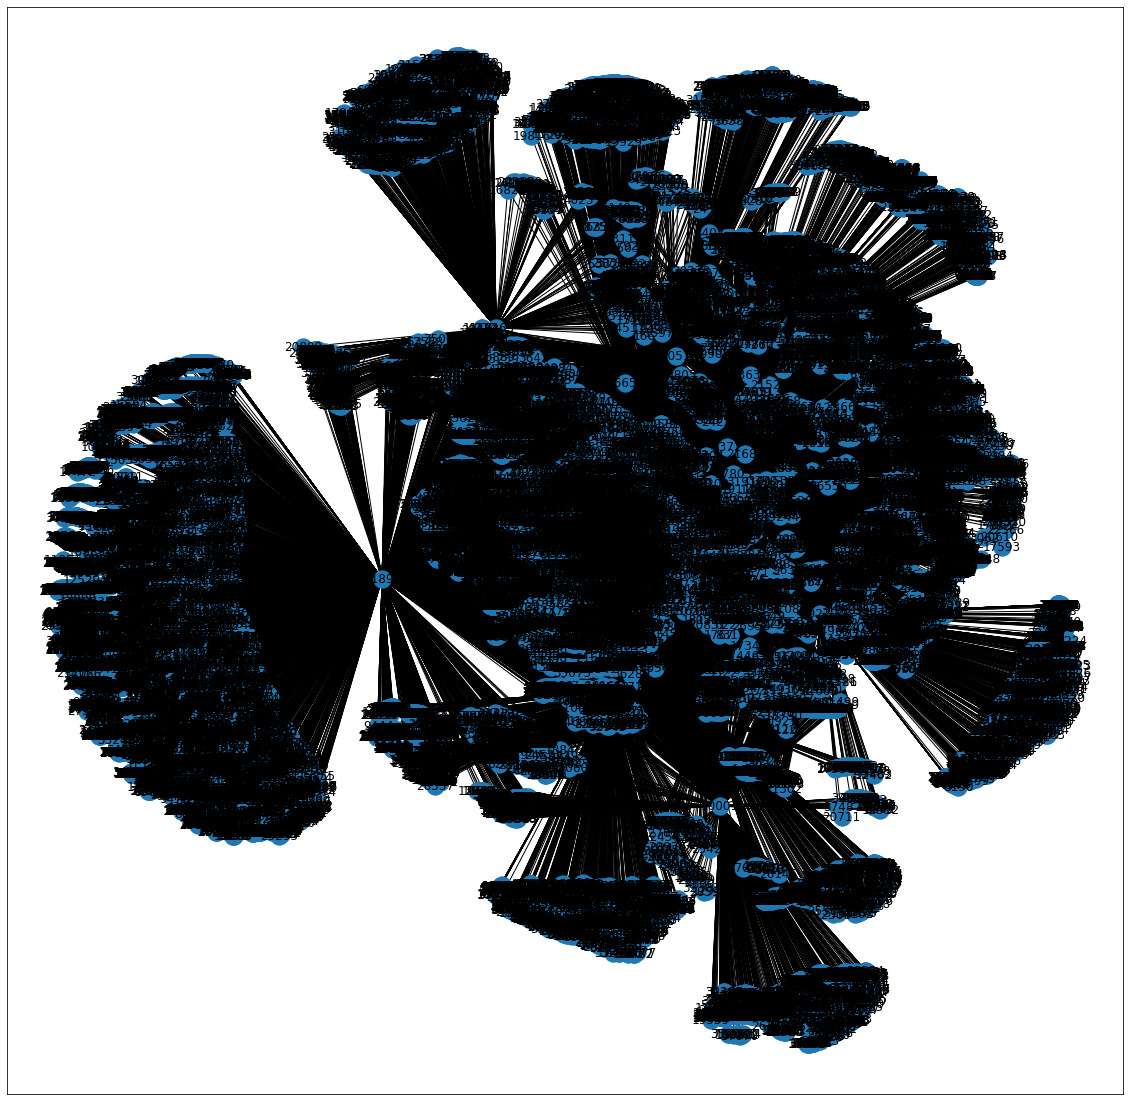

In [44]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G2);